# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import helper
import random
import csv
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import random
from sklearn.utils import shuffle
from collections import Counter
import tensorflow as tf
from tensorflow.contrib.layers import flatten
# Visualizations will be shown in the notebook.
%matplotlib inline

In [2]:
# Load pickled data
X_train, y_train = helper.read_train_data()
X_valid, y_valid = helper.read_valid_data()
X_test, y_test = helper.read_test_data()

In [3]:
# Test if the length of features are the same as labels
print('Test if the length of features are the same as labels...')
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))
print('Test passed!')

Test if the length of features are the same as labels...
Test passed!


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

### Distribution of classes in the training, validation and test set
As you can see here distribution of all data sets are almost the same. Also there are more examples of some classes like "speed limit" signes than the others.

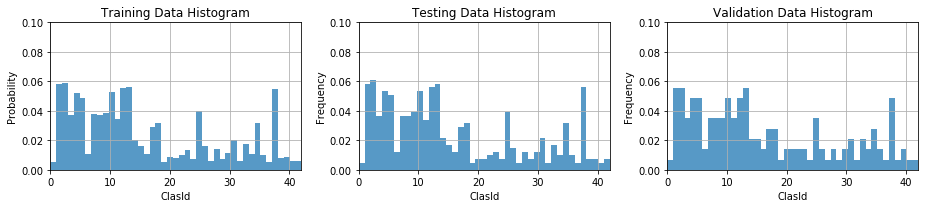

In [5]:
helper.on_draw_data_histogram(y_train, y_valid, y_test)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

---
### Description
#### Preprocessing the input images
To have a better data set to train, validate, and test the model I did the following steps:
   - Gamma adjustment
   - Converting the RGB image to a grayscale image
   - Contrast adjustment
   - Normalization: for normalization I used `(pixel - mean)/std`, in which `mean` is the mean of image and `std` is standard deviation of image

> `helper.image_preprocessing()` function is responsible to preprocess each image in data set.

In [7]:
SignNames = helper.read_sign_names()

shape in/out: (32, 32, 3) (32, 32, 1)


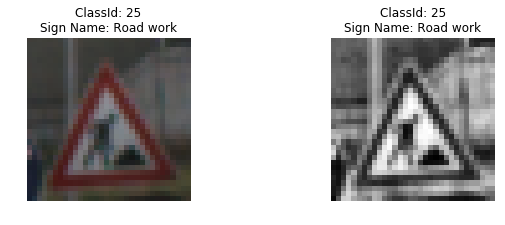

In [8]:
# Test the function
index = random.randint(0, len(X_train))
img = X_train[index].squeeze()
img_p = helper.image_preprocessing(img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs[0].axis('off')
axs[0].imshow(img, cmap='gray')
axs[0].set_title('ClassId: {0}\nSign Name: {1}'.format(y_train[index], SignNames[y_train[index]]))

axs[1].axis('off')
axs[1].imshow(img_p[:,:,0], cmap='gray')
axs[1].set_title('ClassId: {0}\nSign Name: {1}'.format(y_train[index], SignNames[y_train[index]]))

print('shape in/out:', img.shape, img_p.shape)

#### Building the jittered dataset
Additionally, I build a jittered dataset by adding 4 transformed versions of the original training set, yielding
173995 samples for training, 22050 for validation, and 63150 for testing. Samples are randomly perturbed in scale ([0.9,1.1] ratio) and rotation
([-15,+15] degrees).

Run the next cell to create jittered data, concatenate them to main data, preprocess them, and save the result. **If you already ran it, continue from the next cell.**

In [9]:
helper.process_train(X_train, y_train)
helper.process_valid(X_valid, y_valid)
helper.process_test(X_test, y_test)

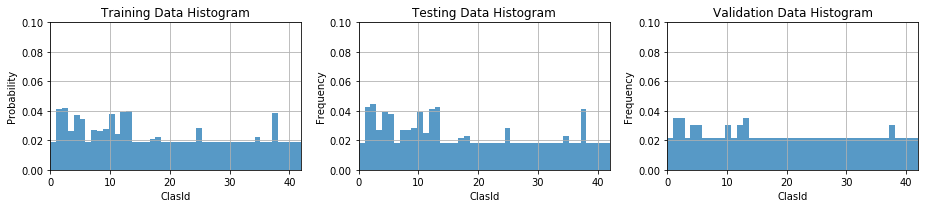

In [10]:
X_train_p, y_train_p = helper.read_processed_train_data()
X_valid_p, y_valid_p = helper.read_processed_valid_data()
X_test_p, y_test_p = helper.read_processed_test_data()

helper.on_draw_data_histogram(y_train_p, y_valid_p, y_test_p)

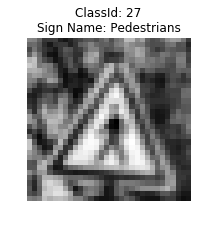

In [20]:
index = random.randint(0, len(X_train_p))
img = X_train_p[index].squeeze()

fig, axs = plt.subplots(1,1, figsize=(5, 3))
axs.axis('off')
axs.imshow(img, cmap='gray')
axs.set_title('ClassId: {0}\nSign Name: {1}'.format(y_train_p[index], SignNames[y_train_p[index]]))

## Setup TensorFlow

### Dimensionality
Given:
   - our input layer has a width of `W` and a height of `H`
   - our convolutional layer has a filter size `F`
   - we have a stride of `S`
   - a padding of `P`
   - and the number of filters `K`,
  
the following formula gives us the width of the next layer: `W_out = [(W−F+2P)/S] + 1`.

The output height would be `H_out = [(H-F+2P)/S] + 1`.

And the output depth would be equal to the number of filters `D_out = K`.

The output volume would be `W_out * H_out * D_out`.

> `helper.get_variable_sizes()` calculates the size of all layers with 2 fully-connected layers.

In [21]:
_ = helper.get_variable_sizes(43, stride = 1, k_size = 2, padding = 'VALID',\
                       w_in = 32, h_in = 32, d_in = 1, \
                       f0_size=5, f1_size=5, f1_d=6, l2_d=16, \
                       fc1_out = 800, fc2_out= 200)

filter0: 5x5x1
conv1: 28x28x6
max_p1: 14x14x6
filter1: 5x5x6
conv2: 10x10x16
max_p2: 5x5x16
fc1_in: 400
fc1_out: 800
fc2_in: 800
fc2_out: 200
out_in: 200
out_size: 43


> `helper.get_variable_sizes2()` calculates the size of all layers with only 1 fully-connected layer.

In [22]:
_ = helper.get_variable_sizes2(43, stride = 1, k_size = 2, padding = 'VALID',\
                       w_in = 32, h_in = 32, d_in = 1, \
                       f0_size=5, f1_size=5, f1_d=6, l2_d=16, \
                       fc1_out = 800)

filter0: 5x5x1
conv1: 28x28x6
max_p1: 14x14x6
filter1: 5x5x6
conv2: 10x10x16
max_p2: 5x5x16
fc1_in: 400
fc1_out: 800
out_in: 800
out_size: 43


### Model Architecture: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

---
### Description
#### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. C is 1 in this case. Because images are gray scale.

#### Architecture
   - **Layer 1: Convolutional.** The output shape should be 25x25x32.
   - **Activation.** ReLU ia the activation function.
   - **Pooling.** The output shape should be 12x12x32.
   - **Layer 2: Convolutional.** The output shape should be 8x8x64.
   - **Activation.** ReLU ia the activation function.
   - **Pooling.** The output shape should be 4x4x64.
   - **Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported.
   - **Layer 3: Fully Connected.** This should have 512 outputs.
   - **Activation.** ReLU ia the activation function.
   - **Layer 4: Fully Connected.** This should have 128 outputs.
   - **Activation.** ReLU ia the activation function.
   - **Layer 5: Fully Connected (Logits).** This should have 43 outputs.
   - **Output** Return the result of the 2nd fully connected layer.
   
> As you can see there are `conv_net()` and `conv_net2()` which biuld our models. `conv_net()` builds a model with the same architecture as described above and `conv_net()2` builds a model with the same architecture but doesn't have second fully-connected layer.

In [23]:
def conv2d(x, W, b, strides, name, padding='VALID'):
    # strides = [batch, height, width, depth]
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding, name=name)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k, name, padding='VALID'):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        name=name,
        padding=padding)


def conv_net(x, weights, biases, keep_prob, strides, k, padding):
    # Layer 1: Convolutional. Input = 32x32x3. 
    conv1 = conv2d(x, weights['wc1'], biases['bc1'], strides=strides, name='conv1', padding=padding)
    print('conv1')
    print(conv1.get_shape())
    # Pooling
    conv1 = maxpool2d(conv1, k=k, name='mp1', padding=padding)
    print('mp1')
    print(conv1.get_shape())

    # Layer 2: Convolutional
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'], strides=strides, name='conv2', padding=padding)
    print('conv2')
    print(conv2.get_shape())
    conv2 = maxpool2d(conv2, k=k, name='mp2', padding=padding)
    print('mp2')
    print(conv2.get_shape())

    # Flatten the output
    fc0 = flatten(conv2)
    print('fc0')
    print(fc0.get_shape())
    
    # Layer 3: Fully connected layer 1
    fc1 = tf.add(tf.matmul(fc0, weights['wd1']), biases['bd1'], name='fc1')
    fc1 = tf.nn.relu(fc1, name='fca1')
    fc1 = tf.nn.dropout(fc1, keep_prob, name='fcad1')
    print('fc1')
    print(fc1.get_shape())
    
    # Layer 4: Fully connected layer 2
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'], name='fc2')
    fc2 = tf.nn.relu(fc2, name='fca2')
    fc2 = tf.nn.dropout(fc2, keep_prob, name='fcad2')
    print('fc2')
    print(fc2.get_shape())
    
    # Layer 5: Output Layer - class prediction
    logits = tf.add(tf.matmul(fc2, weights['wout']), biases['bout'], name='logits')
    print('logits')
    print(logits.get_shape())
    return logits

def conv_net2(x, weights, biases, keep_prob, strides, k, padding):
    # Layer 1: Convolutional. Input = 32x32x3. 
    conv1 = conv2d(x, weights['wc1'], biases['bc1'], strides=strides, name='conv1', padding=padding)
    print('conv1')
    print(conv1.get_shape())
    # Pooling
    conv1 = maxpool2d(conv1, k=k, name='mp1', padding=padding)
    print('mp1')
    print(conv1.get_shape())

    # Layer 2: Convolutional
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'], strides=strides, name='conv2', padding=padding)
    print('conv2')
    print(conv2.get_shape())
    conv2 = maxpool2d(conv2, k=k, name='mp2', padding=padding)
    print('mp2')
    print(conv2.get_shape())

    # Flatten the output
    fc0 = flatten(conv2)
    print('fc0')
    print(fc0.get_shape())
    
    # Layer 3: Fully connected layer 1
    fc1 = tf.add(tf.matmul(fc0, weights['wd1']), biases['bd1'], name='fc1')
    fc1 = tf.nn.relu(fc1, name='fca1')
    fc1 = tf.nn.dropout(fc1, keep_prob, name='fcad1')
    print('fc1')
    print(fc1.get_shape())
    
    # Layer 4: Output Layer - class prediction
    logits = tf.add(tf.matmul(fc1, weights['wout']), biases['bout'], name='logits')
    print('logits')
    print(logits.get_shape())
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [25]:
# For conv_net which has 2 fully_connected layers
def training_pipeline(x, weights, biases, keep_prob, learning_rate, strides, k, padding):
    logits = conv_net(x, weights, biases, keep_prob, strides, k, padding)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, name='optimizer')
    training_operation = optimizer.minimize(loss_operation)
    
    return logits, training_operation

# For conv_net2 which has 1 fully_connected layer
def training_pipeline2(x, weights, biases, keep_prob, learning_rate, strides, k, padding):
    logits = conv_net2(x, weights, biases, keep_prob, strides, k, padding)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, name='optimizer')
    training_operation = optimizer.minimize(loss_operation)
    
    return logits, training_operation

#### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [26]:
def evaluate(accuracy_operation, X_data, y_data, batch_size):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Generating weights and biases

In [27]:
# For get_weights_biases which has 2 fully_connected layers
def get_weights_biases(n_input_depth, n_classes, mu, sigma, strides, kernels, padding):
    w_f0, h_f0, d_f0, w_f1, h_f1, d_f1, d_l2, \
        fc1_in, fc1_out, fc2_in, fc2_out, out_in, out_size = \
            helper.get_variable_sizes(n_classes, stride=strides, k_size=kernels, padding=padding,\
                       w_in = 32, h_in = 32, d_in = n_input_depth, \
                       f0_size=8, f1_size=5, f1_d=32, l2_d=64, \
                       fc1_out = 512, fc2_out= 128)
#                        w_in = 32, h_in = 32, d_in = n_input_depth, \
#                        f0_size=5, f1_size=5, f1_d=6, l2_d=16, \
#                        fc1_out = 800, fc2_out= 200)
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    weights = {
        # (height, width, input_depth, output_depth)
        'wc1': tf.Variable(tf.truncated_normal([w_f0, h_f0, d_f0, d_f1], mean = mu, stddev = sigma), name='wc1'),
        # (height, width, input_depth, output_depth)
        'wc2': tf.Variable(tf.truncated_normal([w_f1, h_f1, d_f1, d_l2], mean = mu, stddev = sigma), name='wc2'),
        # (input_size, output_size)
        'wd1': tf.Variable(tf.truncated_normal([fc1_in, fc1_out], mean = mu, stddev = sigma), name='wd1'),
        # (input_size, output_size)
        'wd2': tf.Variable(tf.truncated_normal([fc2_in, fc2_out], mean = mu, stddev = sigma), name='wd2'),
        # (input_size, output_size)
        'wout': tf.Variable(tf.truncated_normal([out_in, out_size], mean = mu, stddev = sigma), name='wout')}

    biases = {
        # (output_depth)
        'bc1': tf.Variable(tf.zeros(d_f1), name='bc1'),
        # (output_depth)
        'bc2': tf.Variable(tf.zeros(d_l2), name='bc2'),
        # (output_size)
        'bd1': tf.Variable(tf.zeros(fc1_out), name='bd1'),
        # (output_size)
        'bd2': tf.Variable(tf.zeros(fc2_out), name='bd2'),
        # (output_size)
        'bout': tf.Variable(tf.zeros(out_size), name='bout')}
    
    return weights, biases

# For get_weights_biases2 which has 1 fully_connected layer
def get_weights_biases2(n_input_depth, n_classes, mu, sigma, strides, kernels, padding):
    w_f0, h_f0, d_f0, w_f1, h_f1, d_f1, d_l2, \
        fc1_in, fc1_out, out_in, out_size = \
            helper.get_variable_sizes2(n_classes, stride=strides, k_size=kernels, padding=padding,\
#                        w_in = 32, h_in = 32, d_in = n_input_depth, \
#                        f0_size=8, f1_size=5, f1_d=32, l2_d=64, \
#                        fc1_out = 512, fc2_out= 128)
                       w_in = 32, h_in = 32, d_in = n_input_depth, \
                       f0_size=5, f1_size=5, f1_d=6, l2_d=16, \
                       fc1_out = 800)
    
    weights = {
        # (height, width, input_depth, output_depth)
        'wc1': tf.Variable(tf.truncated_normal([w_f0, h_f0, d_f0, d_f1], mean = mu, stddev = sigma), name='wc1'),
        # (height, width, input_depth, output_depth)
        'wc2': tf.Variable(tf.truncated_normal([w_f1, h_f1, d_f1, d_l2], mean = mu, stddev = sigma), name='wc2'),
        # (input_size, output_size)
        'wd1': tf.Variable(tf.truncated_normal([fc1_in, fc1_out], mean = mu, stddev = sigma), name='wd1'),
        # (input_size, output_size)
        'wout': tf.Variable(tf.truncated_normal([out_in, out_size], mean = mu, stddev = sigma), name='wout')}

    biases = {
        # (output_depth)
        'bc1': tf.Variable(tf.zeros(d_f1), name='bc1'),
        # (output_depth)
        'bc2': tf.Variable(tf.zeros(d_l2), name='bc2'),
        # (output_size)
        'bd1': tf.Variable(tf.zeros(fc1_out), name='bd1'),
        # (output_size)
        'bout': tf.Variable(tf.zeros(out_size), name='bout')}
    
    return weights, biases


def get_keep_prob():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')
    return keep_prob

#### Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

#### Hyperparameters  
*Hyperparameters* affect the training speed and model accuracy.

In [28]:
# Hyperparameters
epochs = 40
batch_size = 128
learning_rate = 0.0008
# Dropout, probability to keep units
kp = 0.5

# Modify 2 cells above, i.e. get_weights_biases() function, if you change the following parameters
strides = 1
kernels = 2
padding = 'VALID'

# For weights and biases
mu = 0
sigma = 0.0001

n_input_depth = 1 # Gray scale images

#### Features and Labels
Train LeNet to classify [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

  1. `x` is a placeholder for a batch of input images.
  2. `y` is a placeholder for a batch of output labels.

In [29]:
x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], n_input_depth), name='x')
y = tf.placeholder(tf.int32, (None), name='y')
one_hot_y = tf.one_hot(y, n_classes)

#### Build the model

In [30]:
weights, biases = get_weights_biases(n_input_depth, n_classes, mu, sigma, strides, kernels, padding)
keep_prob = get_keep_prob()

logits, training_operation = \
        training_pipeline(x, weights, biases, keep_prob, learning_rate, strides=strides, k=kernels, padding=padding)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

filter0: 8x8x1
conv1: 25x25x32
max_p1: 12x12x32
filter1: 5x5x32
conv2: 8x8x64
max_p2: 4x4x64
fc1_in: 1024
fc1_out: 512
fc2_in: 512
fc2_out: 128
out_in: 128
out_size: 43
conv1
(?, 25, 25, 32)
mp1
(?, 12, 12, 32)
conv2
(?, 8, 8, 64)
mp2
(?, 4, 4, 64)
fc0
(?, 1024)
fc1
(?, 512)
fc2
(?, 128)
logits
(?, 43)


#### Train the model
Here we train the model and save the result.

In [31]:
save_model_path = './lenet'
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("Training...")
    print()
    for i in range(epochs):
        X_train_p, y_train_p = shuffle(X_train_p, y_train_p)
        for offset in range(0, n_train, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train_p[offset:end], y_train_p[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: kp})
            
        validation_accuracy = evaluate(accuracy_operation, X_valid_p, y_valid_p, batch_size)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}\n".format(validation_accuracy))
        
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.303

EPOCH 2 ...
Validation Accuracy = 0.766

EPOCH 3 ...
Validation Accuracy = 0.843

EPOCH 4 ...
Validation Accuracy = 0.890

EPOCH 5 ...
Validation Accuracy = 0.902

EPOCH 6 ...
Validation Accuracy = 0.924

EPOCH 7 ...
Validation Accuracy = 0.920

EPOCH 8 ...
Validation Accuracy = 0.926

EPOCH 9 ...
Validation Accuracy = 0.933

EPOCH 10 ...
Validation Accuracy = 0.947

EPOCH 11 ...
Validation Accuracy = 0.942

EPOCH 12 ...
Validation Accuracy = 0.947

EPOCH 13 ...
Validation Accuracy = 0.950

EPOCH 14 ...
Validation Accuracy = 0.947

EPOCH 15 ...
Validation Accuracy = 0.952

EPOCH 16 ...
Validation Accuracy = 0.953

EPOCH 17 ...
Validation Accuracy = 0.957

EPOCH 18 ...
Validation Accuracy = 0.953

EPOCH 19 ...
Validation Accuracy = 0.953

EPOCH 20 ...
Validation Accuracy = 0.961

EPOCH 21 ...
Validation Accuracy = 0.968

EPOCH 22 ...
Validation Accuracy = 0.963

EPOCH 23 ...
Validation Accuracy = 0.960

EPOCH 24 ...
Validation Accura

### Changing training model and hyper parameters
With *changing the size of each layer or hyper parameters* we can build and train a model wich is able to predict with a high accuracy. You can see the multiple tries listed below. **The last one is the final trained model.**

#### 1. Validation Accuracy: 0.955
--------------------------------------
- `epochs = 25`
- `batch_size = 100`
- `learning_rate = 0.0009`
- `kp = 0.50`
- `strides = 1`
- `kernels = 2`
- `padding = 'VALID'`
- For weights and biases:
  - `mu = 0`, `sigma = 0.0001`
- Others:
  - `n_input_depth = 1, w_in = 32, h_in = 32, f0_size=5, f1_size=5, f1_d=6, l2_d=16, fc1_out = 800, fc2_out= 200`
- 2 fully connected layout before output layout

#### 2. Validation Accuracy: 0.950
--------------------------------------
- `epochs = 25`
- `batch_size = 100`
- `learning_rate = 0.0009`
- `kp = 0.50`
- `strides = 1`
- `kernels = 2`
- `padding = 'VALID'`
- For weights and biases:
  - `mu = 0`, `sigma = 0.0001`
- Others:
  - `n_input_depth = 1, w_in = 32, h_in = 32, f0_size=5, f1_size=5, f1_d=6, l2_d=16, fc1_out = 800`
- 1 fully connected layout before output layout

#### 3. Validation Accuracy: 0.941
--------------------------------------
- `epochs = 25`
- `batch_size = 100`
- `learning_rate = 0.0009`
- `kp = 0.50`
- `strides = 1`
- `kernels = 2`
- `padding = 'VALID'`
- For weights and biases:
  - `mu = 0`, `sigma = 0.0001`
- Others:
  - `n_input_depth = 1, w_in = 32, h_in = 32, f0_size=5, f1_size=5, f1_d=6, l2_d=16, fc1_out = 800, fc2_out= 200`
- 2 fully connected layout before output layout and new dataset

#### 4. Validation Accuracy: 0.965
--------------------------------------
- `epochs = 25`
- `batch_size = 128`
- `learning_rate = 0.001`
- `kp = 0.50`
- `strides = 1`
- `kernels = 2`
- `padding = 'VALID'`
- For weights and biases:
  - `mu = 0`, `sigma = 0.0001`
- Others:
  - `n_input_depth = 1, w_in = 32, h_in = 32, f0_size=8, f1_size=5, f1_d=32, l2_d=64, fc1_out = 512, fc2_out= 128`
- 2 fully connected layout before output layout and new dataset

#### 5. Validation Accuracy: 0.967
--------------------------------------
- `epochs = 40`
- `batch_size = 128`
- `learning_rate = 0.0008`
- `kp = 0.50`
- `strides = 1`
- `kernels = 2`
- `padding = 'VALID'`
- For weights and biases:
  - `mu = 0`, `sigma = 0.0001`
- Others:
  - `n_input_depth = 1, w_in = 32, h_in = 32, f0_size=8, f1_size=5, f1_d=32, l2_d=64, fc1_out = 512, fc2_out= 128`
- 2 fully connected layout before output layout and new dataset

# Checkpoint
The model has been saved to disk. Next time you can start from here intead of starting from scratch.

# Test Model
Test your model against the test dataset. This will be your final accuracy. As you can see the accuracy of the model is 94%.

In [7]:
import helper
import random
import csv
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import random
from sklearn.utils import shuffle
from collections import Counter
import tensorflow as tf
from tensorflow.contrib.layers import flatten
# Visualizations will be shown in the notebook.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 128

save_model_path = './lenet'
n_samples = 5
top_n_predictions = 3

def test_model(test_features, test_labels):
    loaded_graph = tf.Graph()
    with tf.Session(graph=loaded_graph) as sess:
        # Load saved model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')

        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

In [4]:
X_test_p, y_test_p = helper.read_processed_test_data()
test_model(X_test_p, y_test_p)

Testing Accuracy: 0.9444809940126208



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [5]:
SignNames = helper.read_sign_names()

### Load and Output the Images

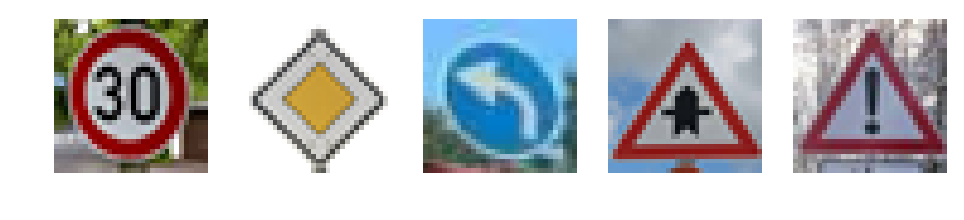

In [8]:
#reading in an image
import glob
import matplotlib.image as mpimg

fig, axs = plt.subplots(1,5, figsize=(8, 2))
fig.subplots_adjust(hspace = .2, wspace=.2)
axs = axs.ravel()

new_images = []

for i, img in enumerate(glob.glob('./traffic-signs-images/*.png')):
    image = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    axs[i].imshow(image)
    new_images.append(image)

new_images = np.asarray(new_images)
# Pre-processing the images with the same pre-processing pipeline used earlier.
X_new_p = [helper.image_preprocessing(img) for img in new_images]
y_new_p = [1, 12, 34, 11, 18]

### Analyze Performance

In [9]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
test_model(X_new_p, y_new_p)

Testing Accuracy: 1.0



### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [14]:
# Run the predictions here and use the model to output the prediction for each image.
loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    loaded_x = loaded_graph.get_tensor_by_name('x:0')
    loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
    loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
    softmax_logits = tf.nn.softmax(loaded_logits)
    top_k = tf.nn.top_k(softmax_logits, k=5)
    my_softmax_logits = sess.run(softmax_logits, feed_dict={loaded_x: X_new_p, loaded_keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={loaded_x: X_new_p, loaded_keep_prob: 1.0})

In [18]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
print(my_top_k)

TopKV2(values=array([[  7.84267783e-01,   2.14224666e-01,   1.49137375e-03,
          6.61399281e-06,   6.19813272e-06],
       [  1.00000000e+00,   1.90708209e-19,   3.26064036e-21,
          8.25148961e-22,   2.53944625e-22],
       [  1.00000000e+00,   2.75898139e-16,   3.73007212e-18,
          2.15126768e-20,   1.12354699e-20],
       [  9.99286234e-01,   7.13804853e-04,   1.18973081e-10,
          2.27878862e-11,   1.23311396e-11],
       [  1.00000000e+00,   5.83028209e-11,   6.30079222e-15,
          2.54975032e-18,   1.11121951e-21]], dtype=float32), indices=array([[ 1,  2,  5, 12, 13],
       [12, 26, 40,  7, 39],
       [34, 35, 38, 12, 29],
       [11, 30, 21, 12,  5],
       [18, 26, 27, 39, 37]], dtype=int32))


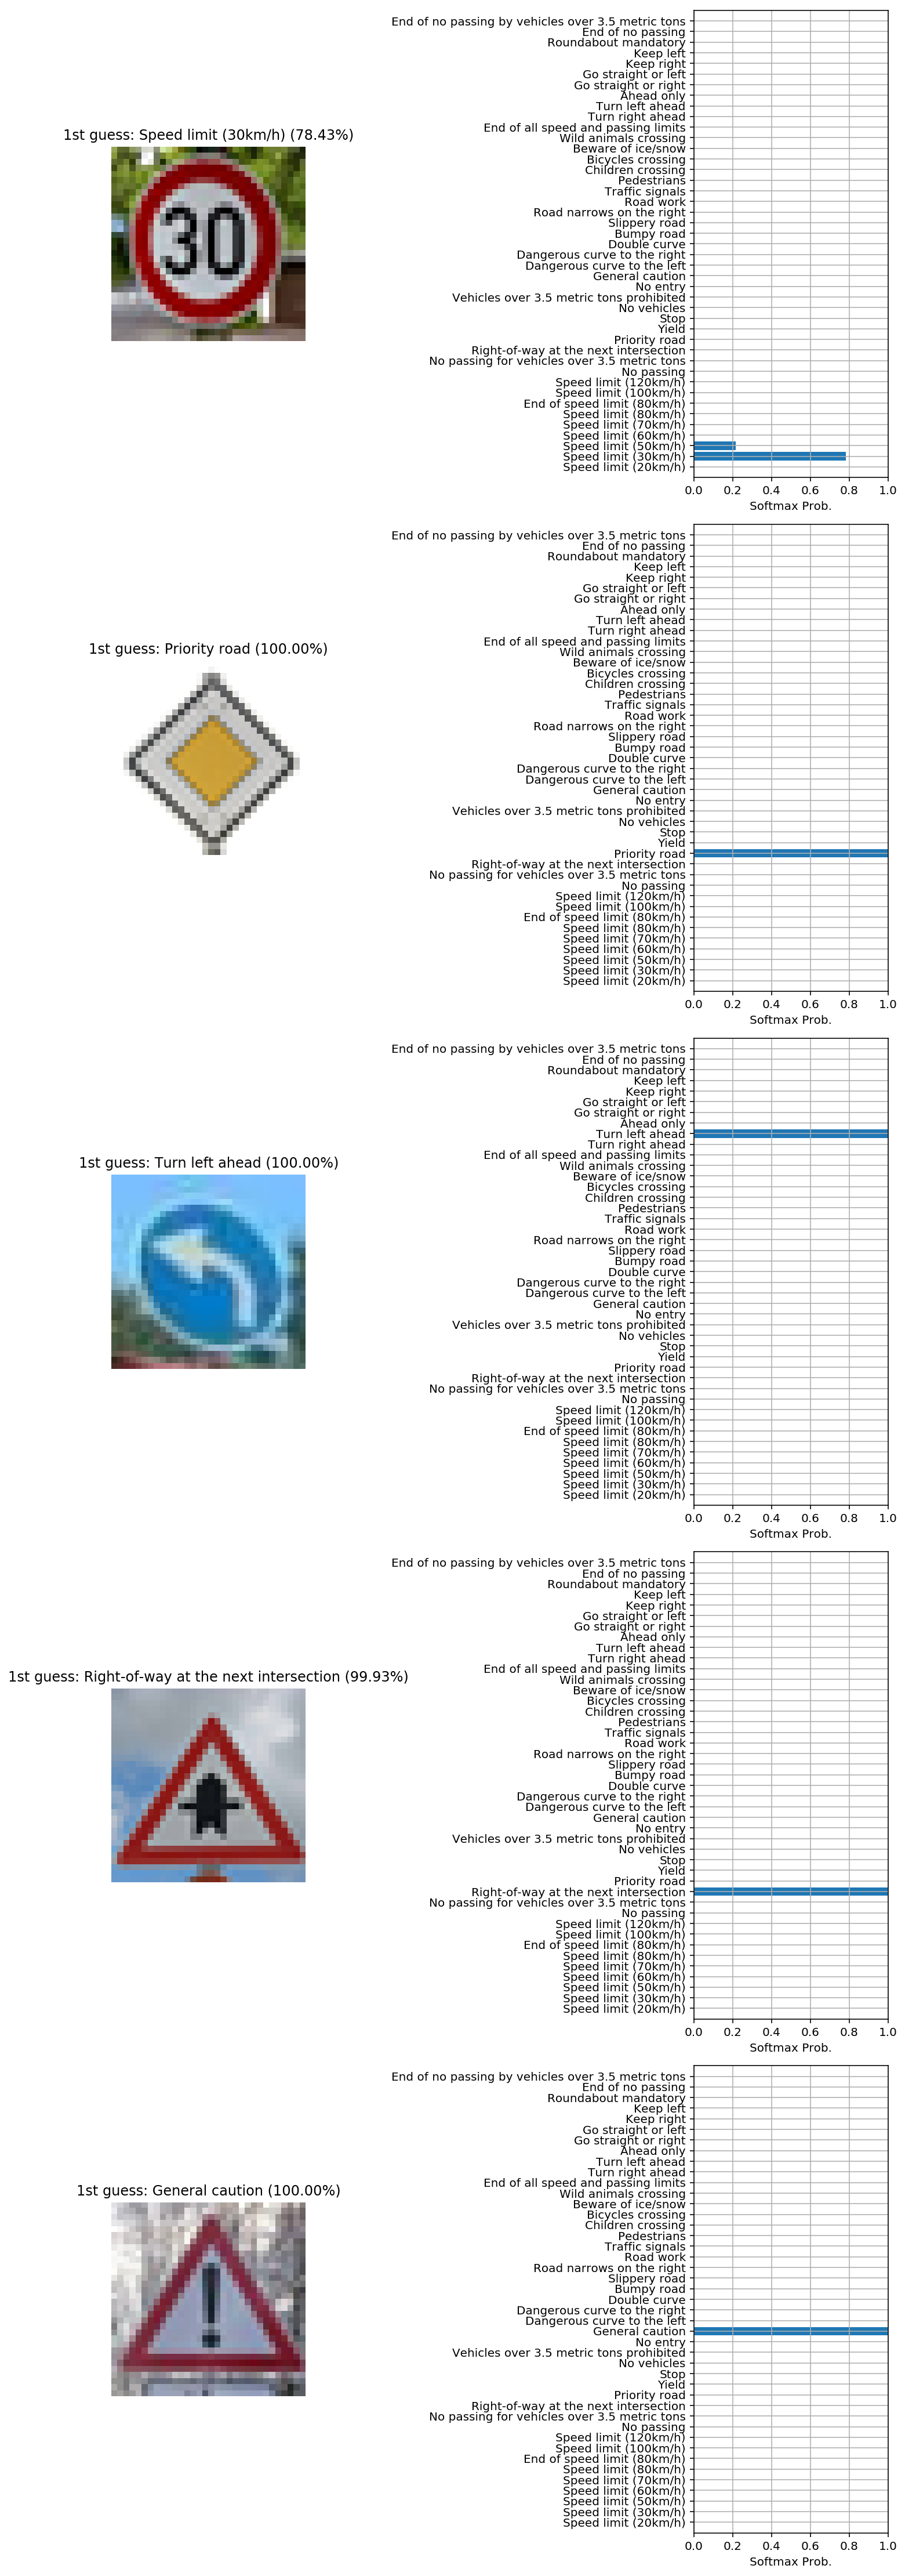

In [15]:
# Visualize the softmax probabilities here.
helper.display_image_predictions(new_images, SignNames, my_top_k, my_softmax_logits)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")